This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [5]:
#importing all required library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import LabelEncoder
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.tree import DecisionTreeRegression 
#from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")


impoting all important libraries

# EDA

In [6]:
#uploading dataset
df=pd.read_csv("baseball_case.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


upload the dataset

In [7]:
#changing Dataset in Dataframe
#df=pd.DataFrame(data=df)

In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

check the columns name of dataset

In [9]:
df.shape

(30, 17)

Dataset have 30 rows, and 17 columns

In [10]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [11]:
df.info()
#getting full info abouth the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


No Null and missing values are there

In [12]:
df.head() #finding top 5 rows of dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [13]:
df.tail() #finding bottom 5 rows of dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# Statistical Approch, EDA and Evaluation

In [14]:
#describing the dataset by statistical values
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Here we described the dataset, Mean and the standard values of data. As we can see here on count row all values are equal (30.000000), so there is no null values in this dataset

In [15]:
#lets check the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

As per dataset information 'W' is the target column so we are checking column info

In [16]:
df["W"]

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [17]:
df.W.value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

# Data Visualization

<AxesSubplot:>

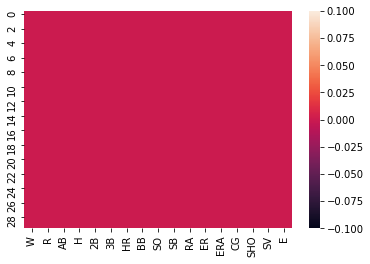

In [18]:
#lets chec kthe null values by heatmap
sns.heatmap(df.isnull())

And see, Dataset has no null value

In [19]:
#lets check data co-relation between variables
#Examploe of Multi variate analysis
df_cor=df.corr()
df_cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


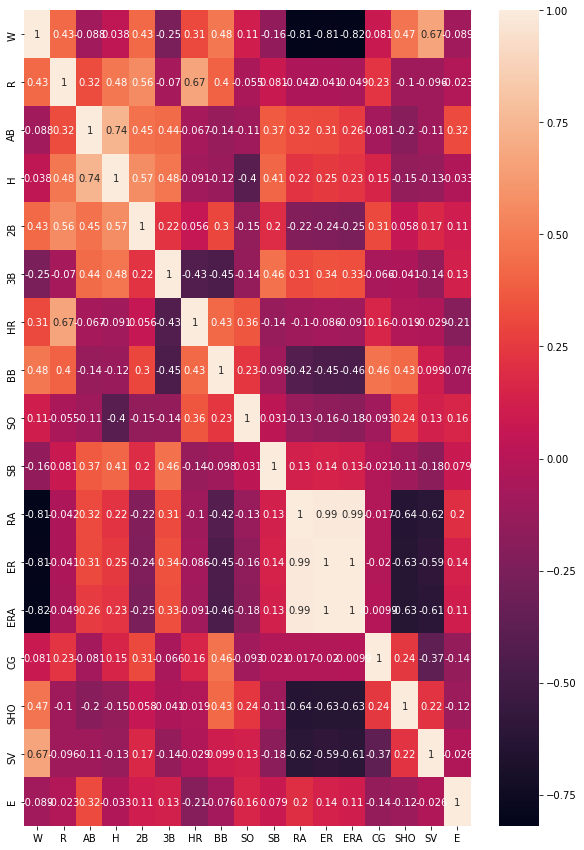

In [20]:
#lets check the heatmap corelation with values
#Example of multivariate plotting
corr_hmap=df.corr()
plt.figure(figsize=(10,15))
sns.heatmap(corr_hmap,annot=True)
plt.show()

in this plot we can see the correlation of the data values, like very good correlation between 'RA'and 'ER','ERA' columns

We re marking W as target value and rest of columns as data value

In [21]:
x=df.drop(columns=['W'])
y=df[['W']]

# Plotting outliers

W         AxesSubplot(0.125,0.657941;0.110714x0.222059)
R      AxesSubplot(0.257857,0.657941;0.110714x0.222059)
AB     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
H      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
2B     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
3B     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
HR        AxesSubplot(0.125,0.391471;0.110714x0.222059)
BB     AxesSubplot(0.257857,0.391471;0.110714x0.222059)
SO     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
SB     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
RA     AxesSubplot(0.656429,0.391471;0.110714x0.222059)
ER     AxesSubplot(0.789286,0.391471;0.110714x0.222059)
ERA          AxesSubplot(0.125,0.125;0.110714x0.222059)
CG        AxesSubplot(0.257857,0.125;0.110714x0.222059)
SHO       AxesSubplot(0.390714,0.125;0.110714x0.222059)
SV        AxesSubplot(0.523571,0.125;0.110714x0.222059)
E         AxesSubplot(0.656429,0.125;0.110714x0.222059)
dtype: object

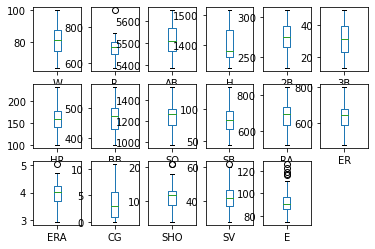

In [22]:
#df.plot
df.plot(kind='box',subplots=True,layout=(3,6))

here we ca see that in some columns there is outliers so we have to remove this

In [23]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

in some columns there is skewness, value less then 0.5 and -0.5, we have to remove skewness

The data distributed not equal in some columns and there is skewness

# Removing Outliers

In [24]:
#Removing the Outliers through IQR method
def removeOutlier(col):
    sorted(col)
    qua1,qua2=col.quantile([0.25,0.75])
    IQR=qua2 - qua1
    lowerRange = qua1- (1.5*IQR)
    upperRange = qua2+(1.5*IQR)
    return lowerRange, upperRange

In [25]:
columns=["R","ERA", "SHO", "SV", "E"]
for i in df[columns]:
    lowScore, highScore= removeOutlier(df[i])
    df[i]=np.where(df[i]>highScore,highScore,df[i])
    df[i]=np.where(df[i]<lowScore,lowScore,df[i])

W         AxesSubplot(0.125,0.657941;0.110714x0.222059)
R      AxesSubplot(0.257857,0.657941;0.110714x0.222059)
AB     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
H      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
2B     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
3B     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
HR        AxesSubplot(0.125,0.391471;0.110714x0.222059)
BB     AxesSubplot(0.257857,0.391471;0.110714x0.222059)
SO     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
SB     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
RA     AxesSubplot(0.656429,0.391471;0.110714x0.222059)
ER     AxesSubplot(0.789286,0.391471;0.110714x0.222059)
ERA          AxesSubplot(0.125,0.125;0.110714x0.222059)
CG        AxesSubplot(0.257857,0.125;0.110714x0.222059)
SHO       AxesSubplot(0.390714,0.125;0.110714x0.222059)
SV        AxesSubplot(0.523571,0.125;0.110714x0.222059)
E         AxesSubplot(0.656429,0.125;0.110714x0.222059)
dtype: object

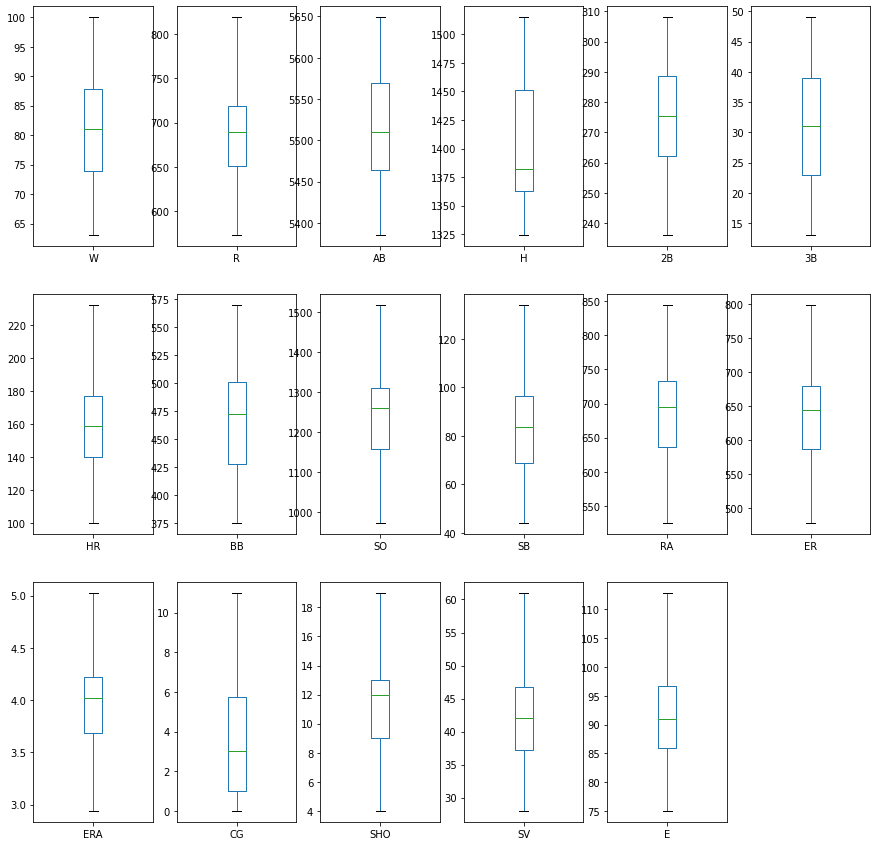

In [26]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(15,15))

In [27]:
#finding resolved skewness of dataset
df.skew()

W      0.047089
R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.504019
dtype: float64

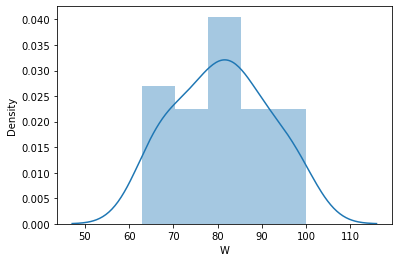

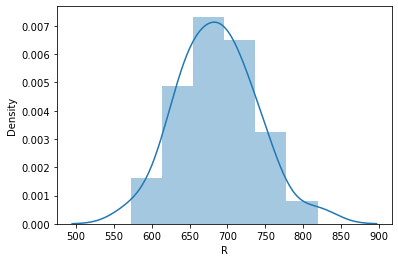

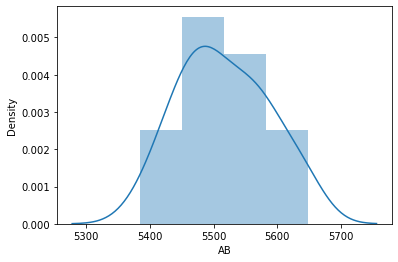

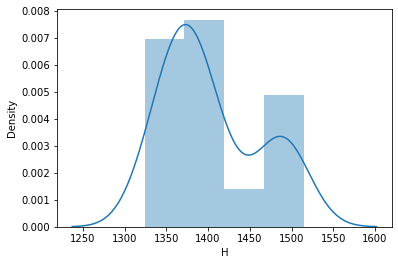

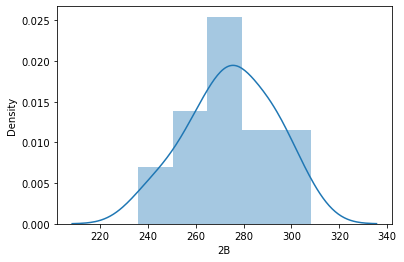

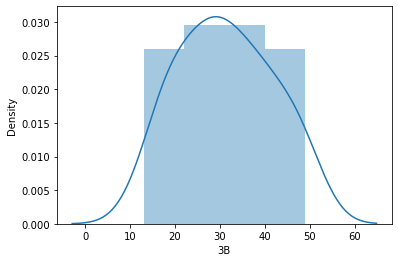

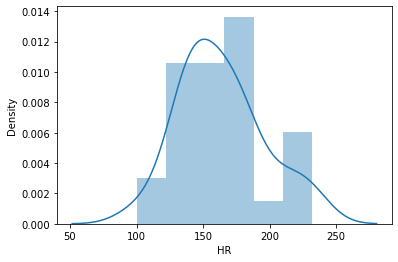

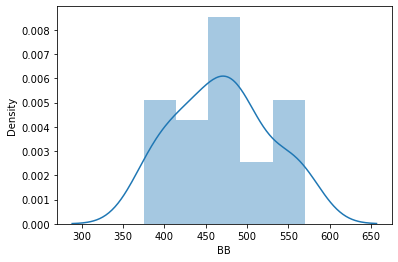

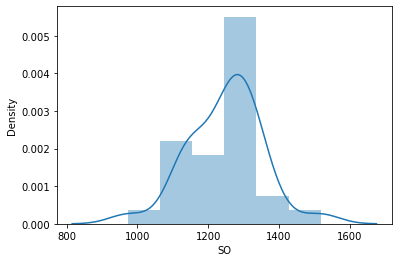

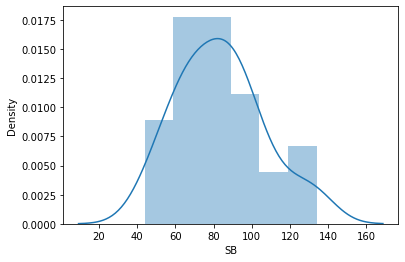

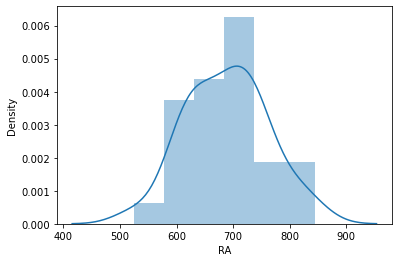

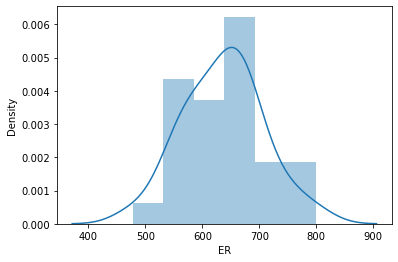

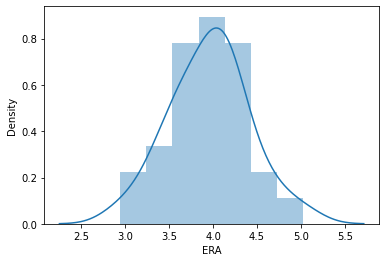

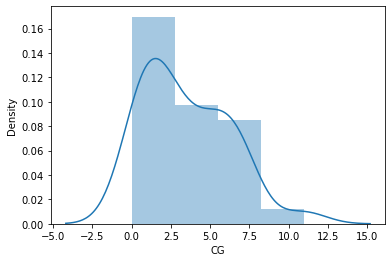

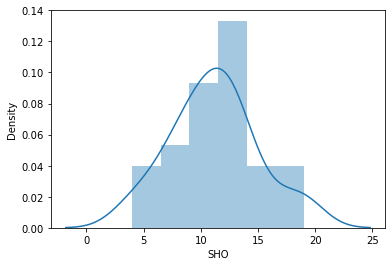

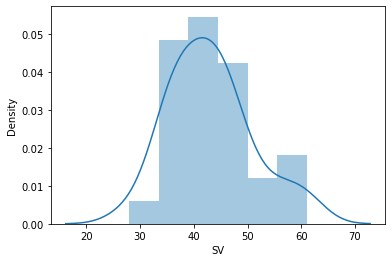

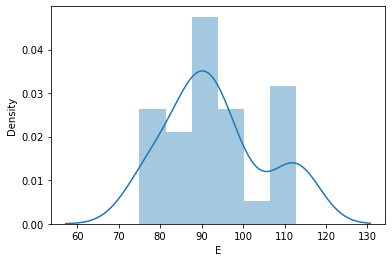

In [28]:
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])
    
# checking skewness through the graph
# skewness almost resolved

In [29]:
x=df.drop(columns=['W'])
y=df[['W']]

In [30]:
df_new=power_transform(x)
df_new=pd.DataFrame(df,columns=x.columns)

In [31]:
df_new.skew()

R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.504019
dtype: float64

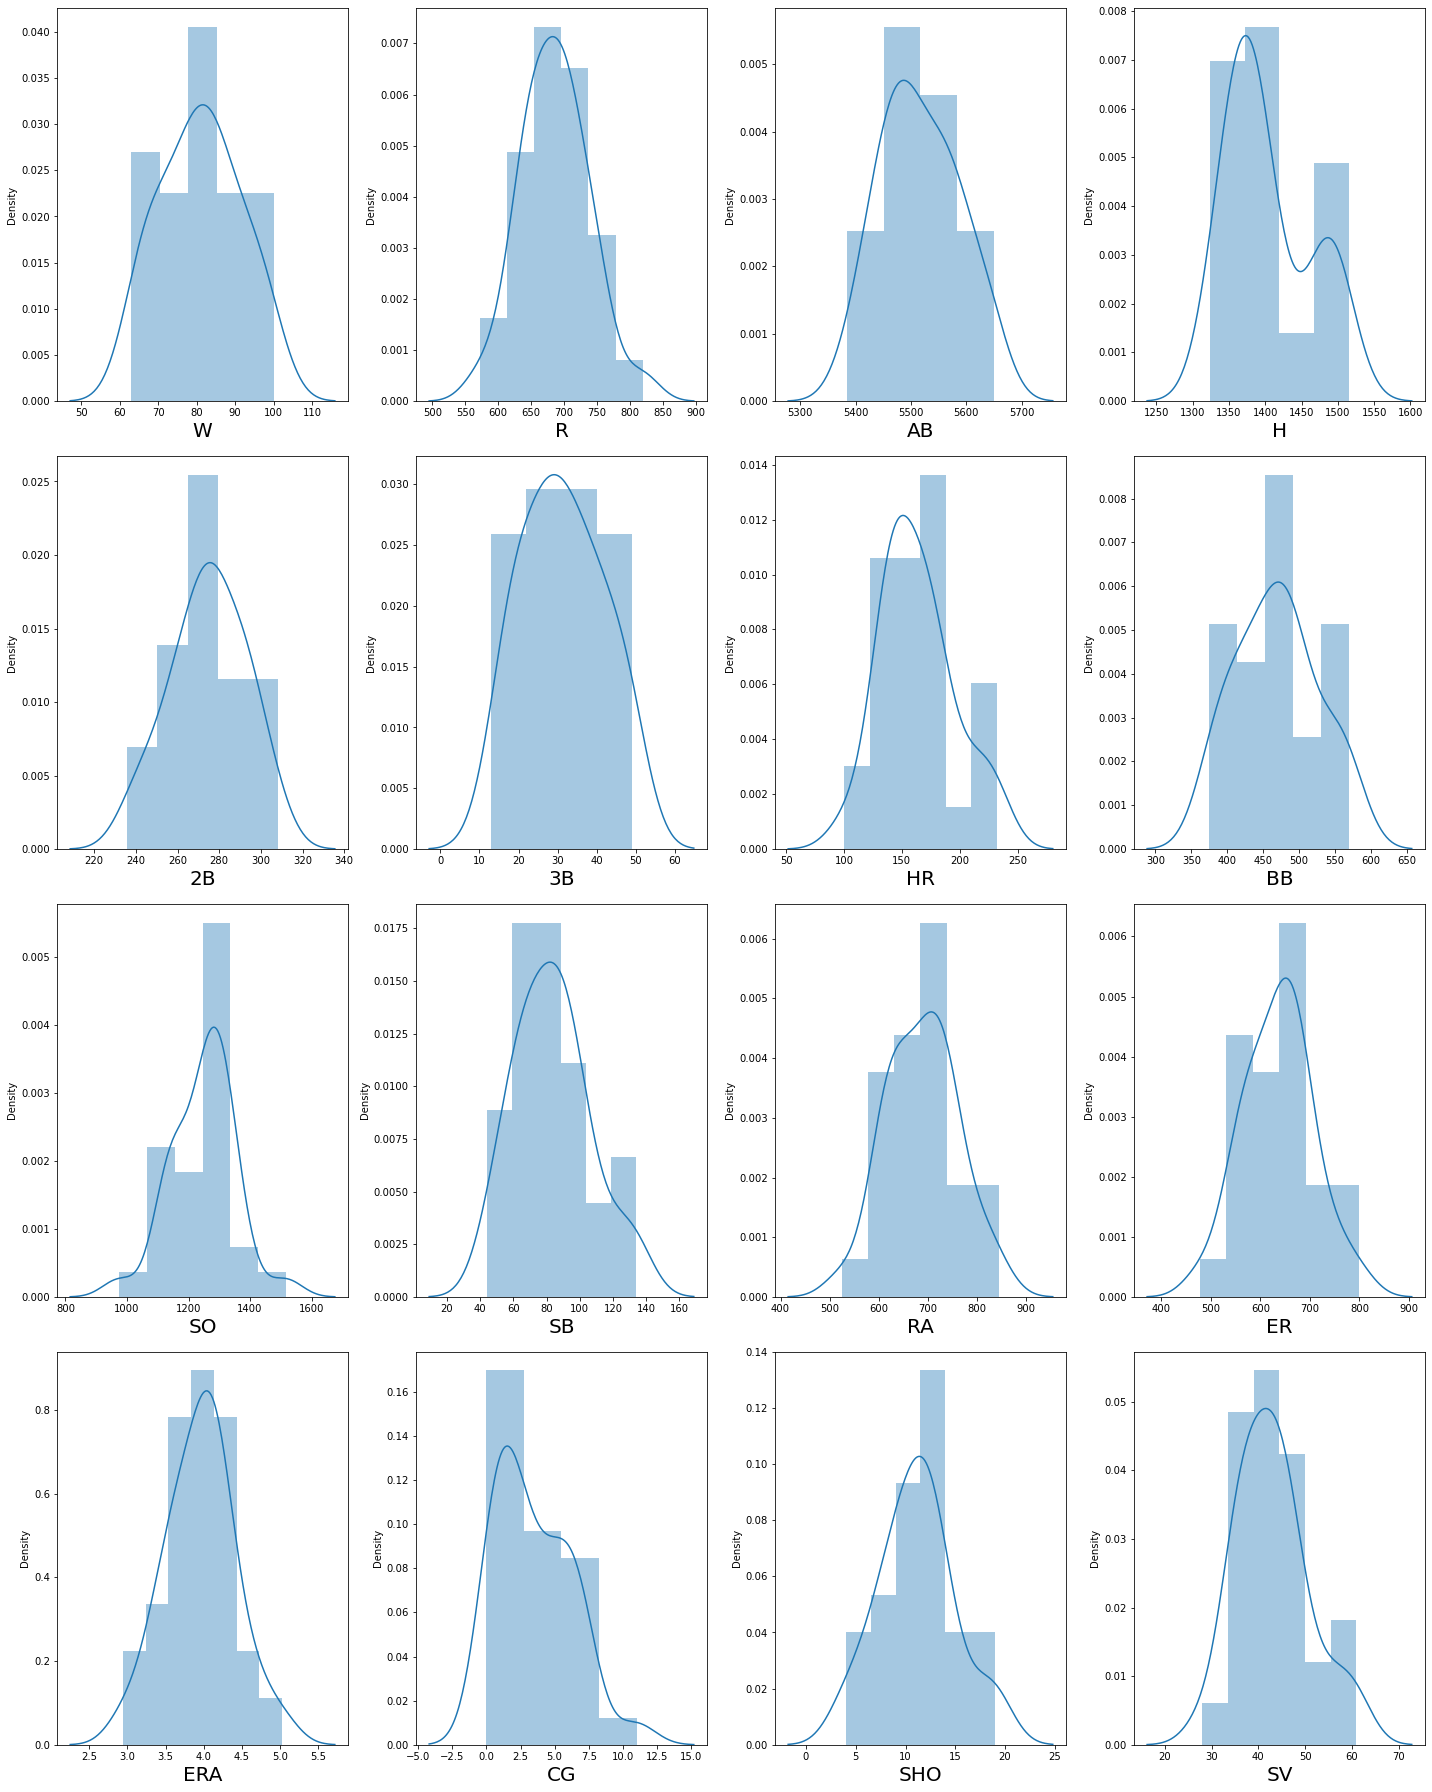

In [32]:
#Now check how the data distributed in every column through graph
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

We removed all outliers from dataset

In [33]:
x=df_new

Lets check the relationship between independent variables and dependent variables

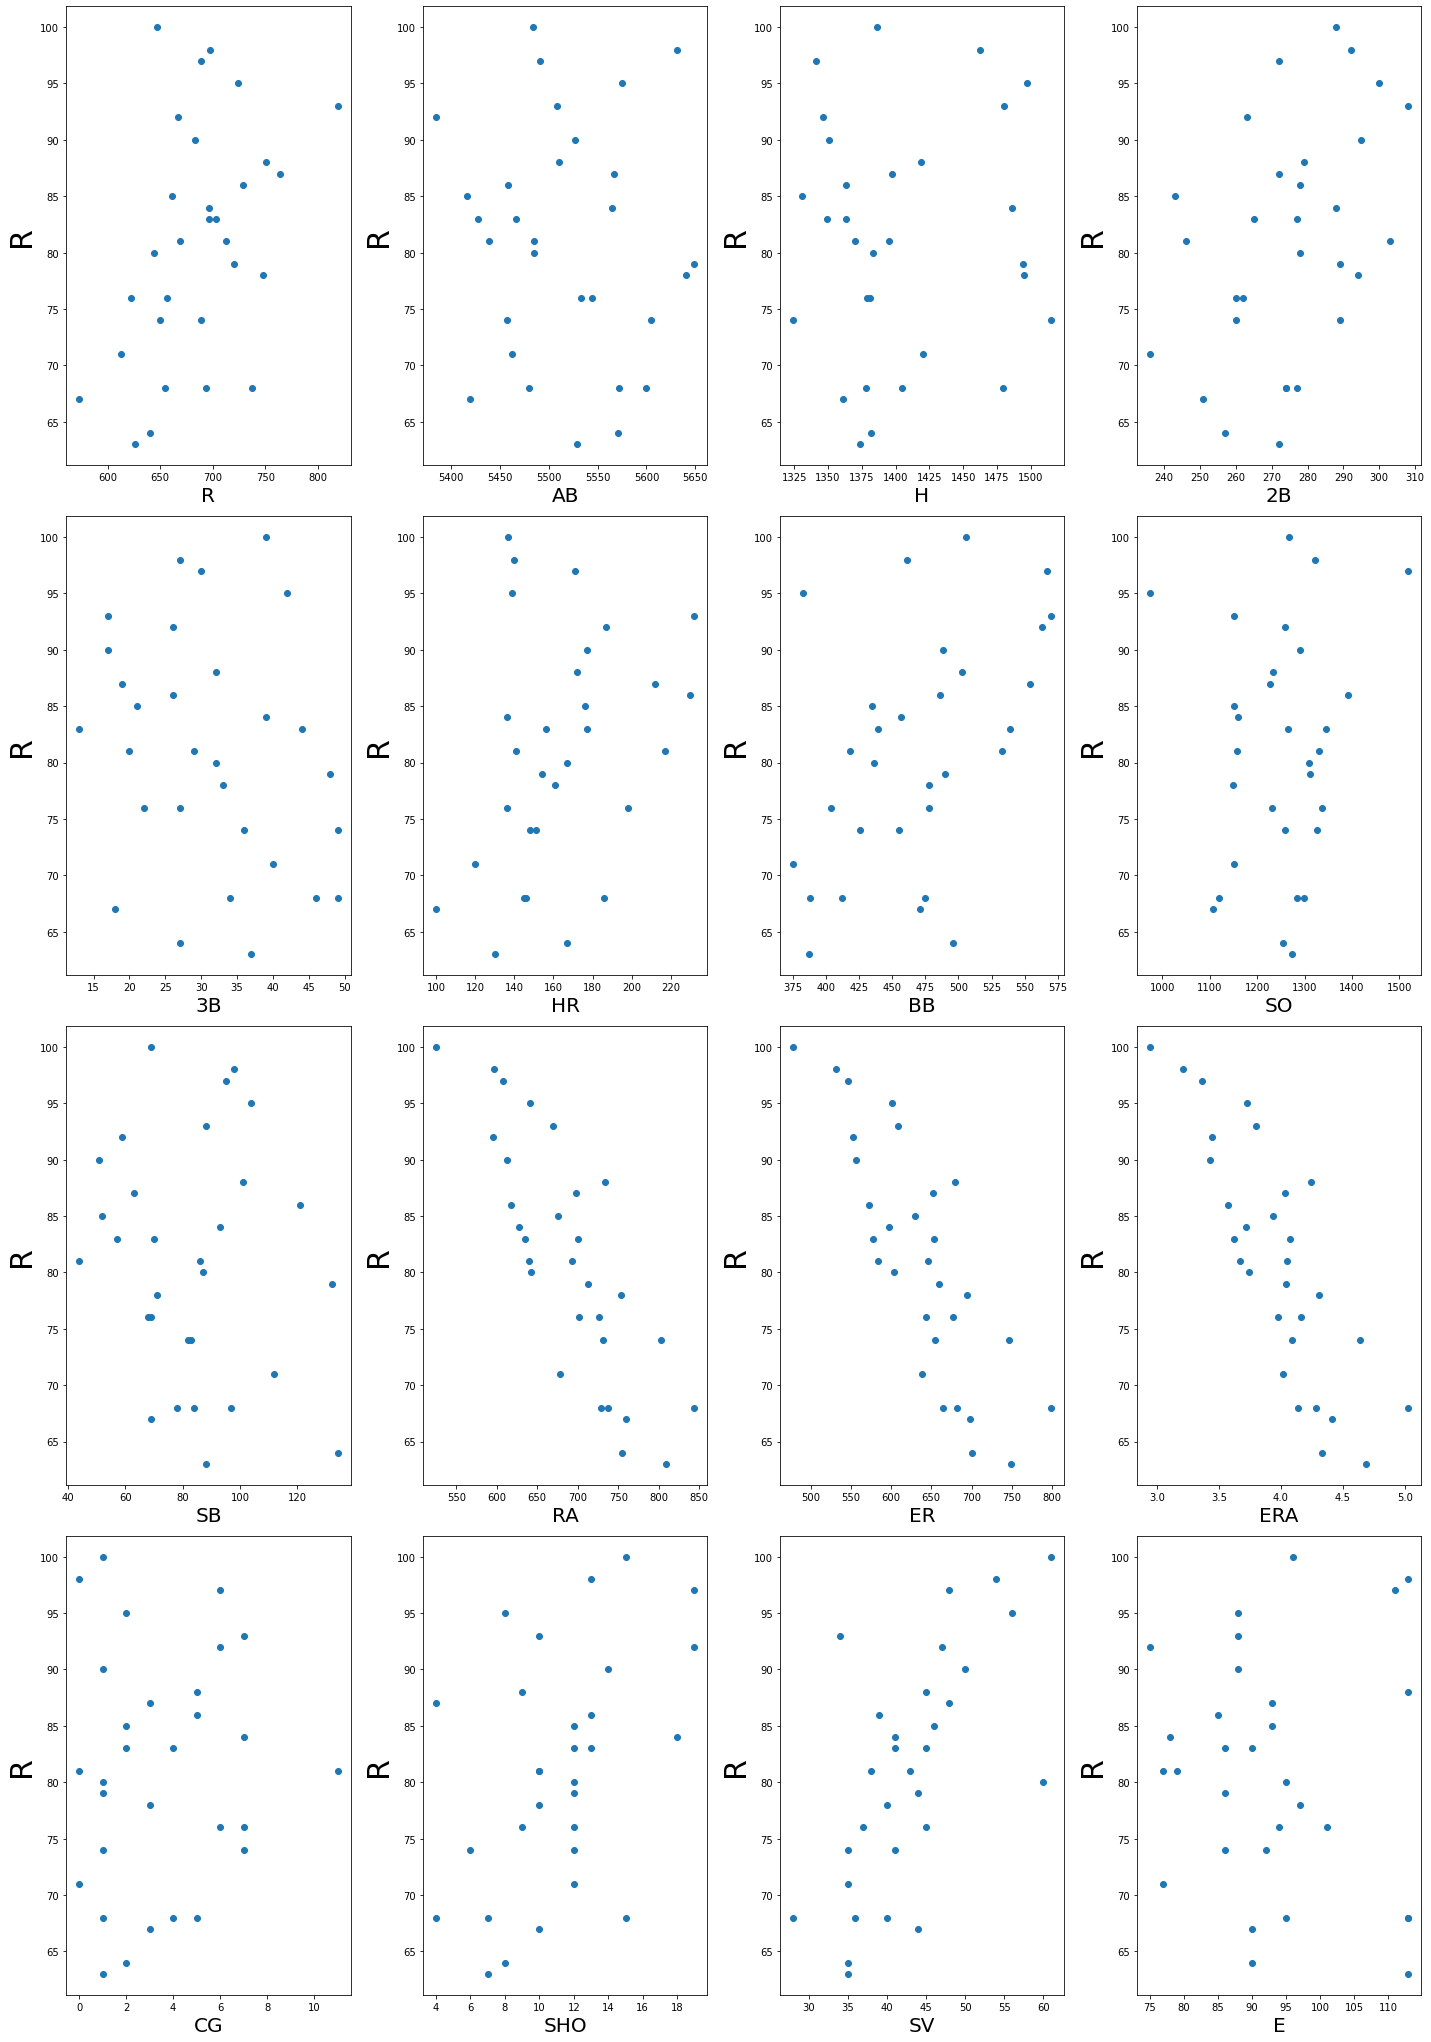

In [34]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=16:
        ax=plt.subplot(5,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('R',fontsize=30)
        
    plotnumber+=1
plt.tight_layout()

# Plotting

# Variate plotting

<AxesSubplot:xlabel='3B', ylabel='count'>

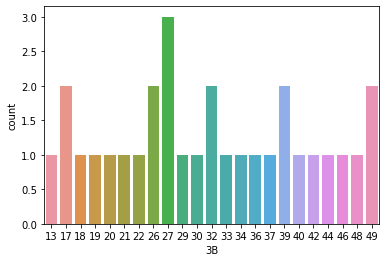

In [35]:
sns.countplot(x='3B',data=df)

<AxesSubplot:xlabel='2B', ylabel='count'>

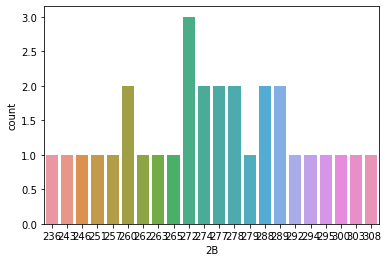

In [36]:
sns.countplot(x='2B',data=df)

<AxesSubplot:xlabel='SO', ylabel='count'>

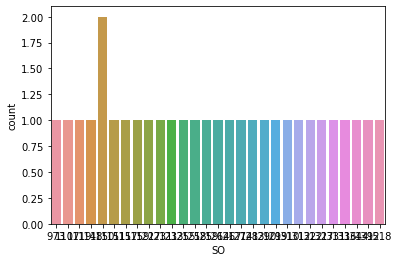

In [37]:
sns.countplot(x='SO',data=df)

<AxesSubplot:xlabel='ERA', ylabel='count'>

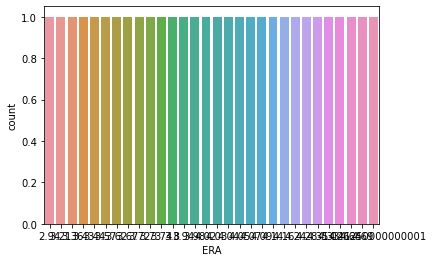

In [38]:
sns.countplot(x='ERA',data=df)

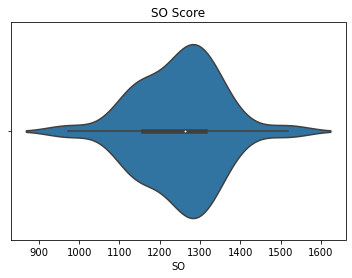

In [39]:
#plotting in violinplot with figure and , title

sns.violinplot(df['SO'])
plt.title('SO Score')
plt.show()

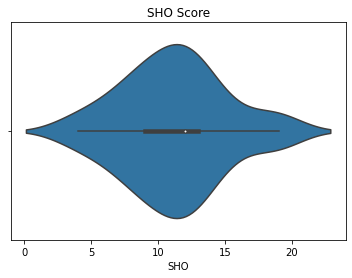

In [40]:
#plotting in violinplot with figure and , title

sns.violinplot(df['SHO'])
plt.title('SHO Score')
plt.show()

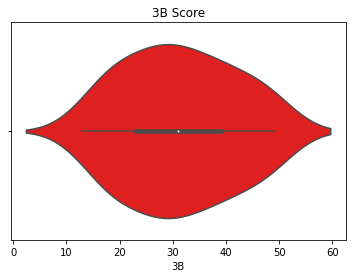

In [41]:
#plotting in violinplot with figure and , title

sns.violinplot(df['3B'],color='red')
plt.title('3B Score')
plt.show()

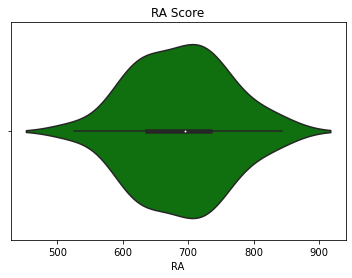

In [42]:
#plotting in violinplot with figure and , title

sns.violinplot(df['RA'],color='green')
plt.title('RA Score')
plt.show()

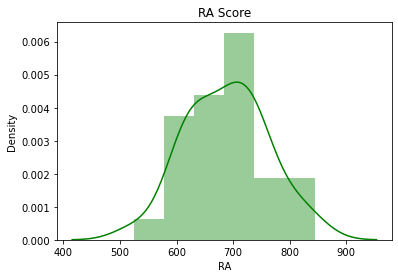

In [43]:
sns.distplot(df['RA'],color='green')
plt.title('RA Score')
plt.show()

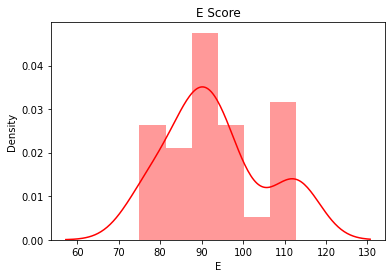

In [44]:
sns.distplot(df['E'],color='red')
plt.title('E Score')
plt.show()

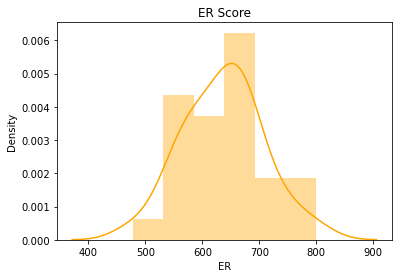

In [45]:
sns.distplot(df['ER'],color='orange')
plt.title('ER Score')
plt.show()

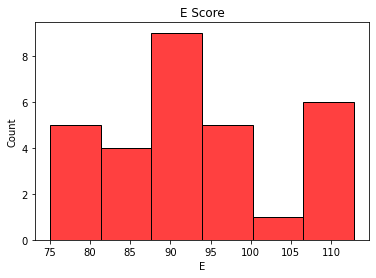

In [46]:
sns.histplot(df['E'],color='red')
plt.title('E Score')
plt.show()

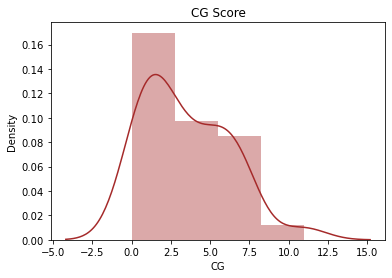

In [47]:
sns.distplot(df['CG'],color='brown')
plt.title('CG Score')
plt.show()

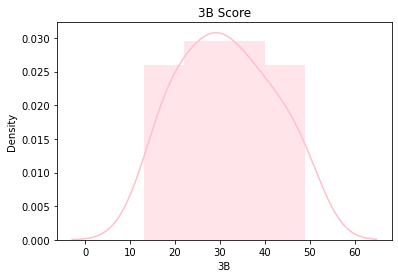

In [48]:
sns.distplot(df['3B'],color='pink')
plt.title('3B Score')
plt.show()

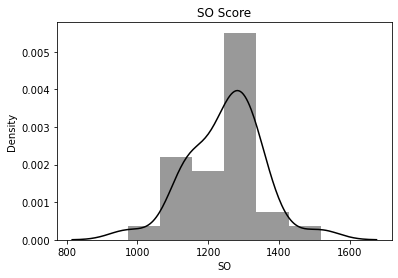

In [49]:
sns.distplot(df['SO'],color='black')
plt.title('SO Score')
plt.show()

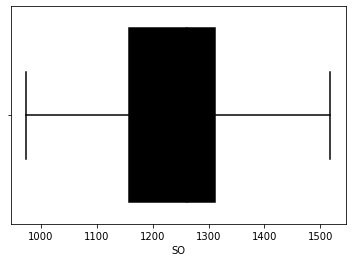

In [50]:
sns.boxplot(df['SO'],color='black')
plt.show()

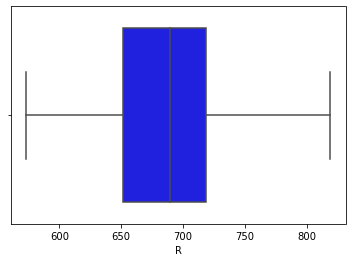

In [51]:
sns.boxplot(df['R'],color='blue')

plt.show()

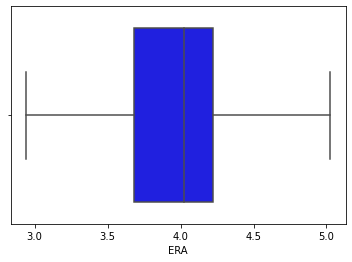

In [52]:
sns.boxplot(df['ERA'],color='blue')

plt.show()

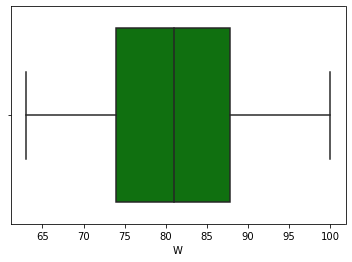

In [53]:
sns.boxplot(df['W'],color='green')

plt.show()

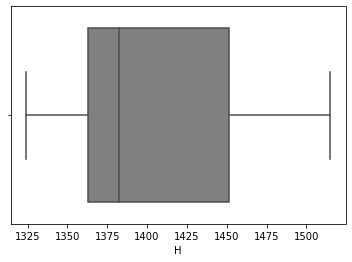

In [54]:
sns.boxplot(df['H'],color='gray')

plt.show()

# Multivariate Example

In [55]:
#sns.pairplot(df)

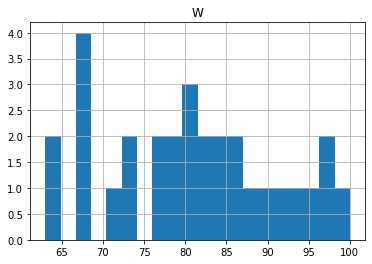

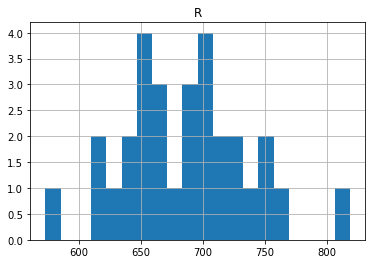

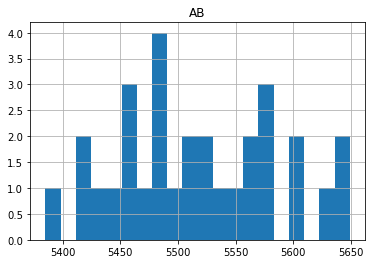

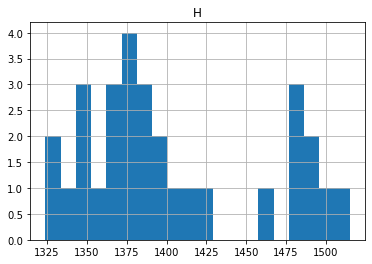

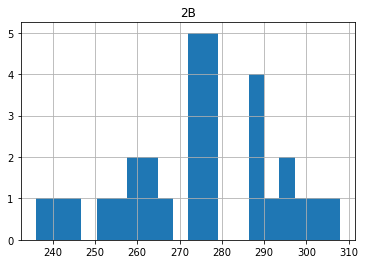

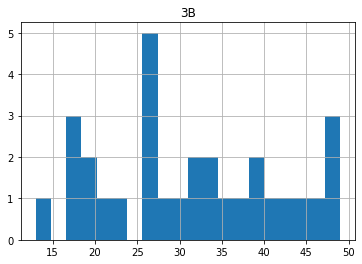

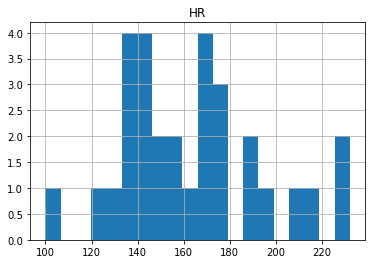

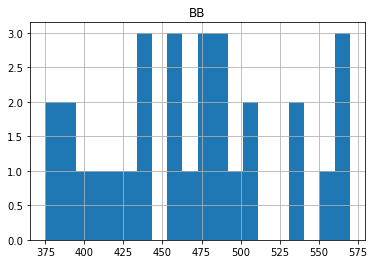

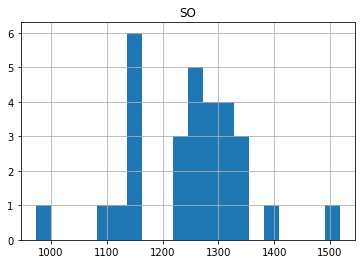

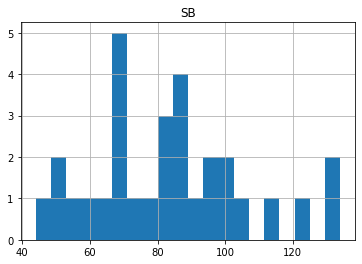

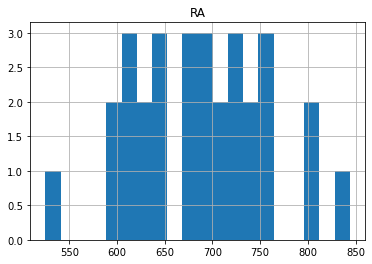

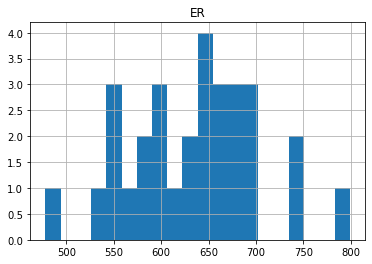

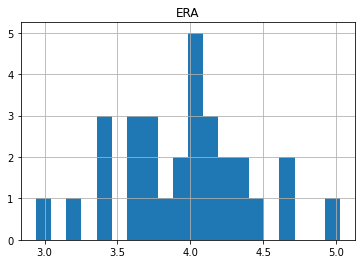

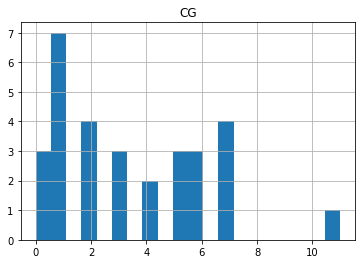

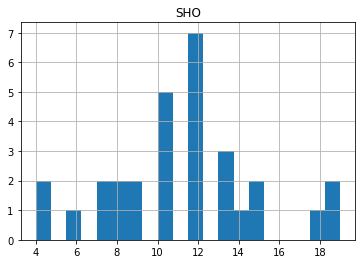

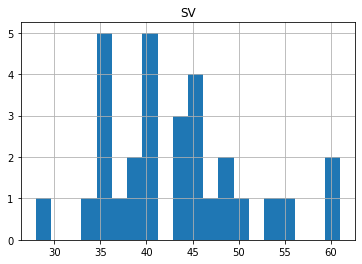

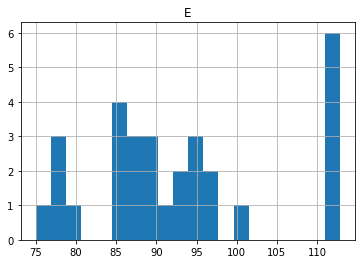

In [56]:
#using the below code creating histplot.
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']

for i in df[columns]:
    plt.figure()
    plt.title(i)
    df[i].hist(bins=20)

check the histplot of all coulmn in same time

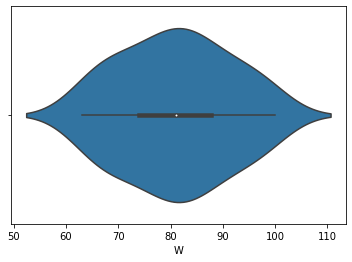

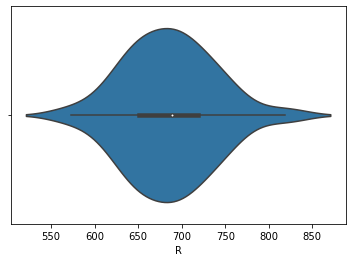

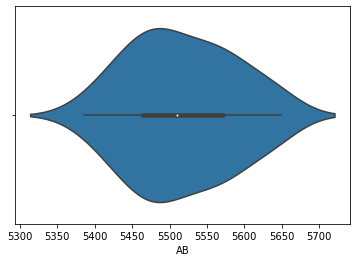

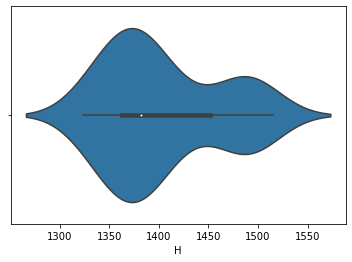

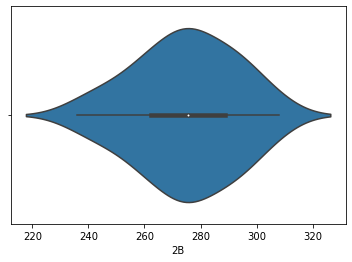

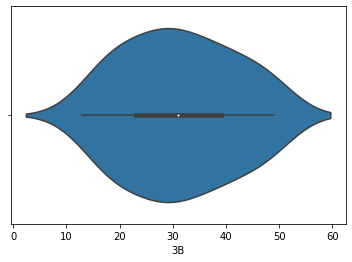

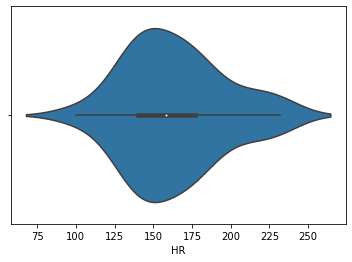

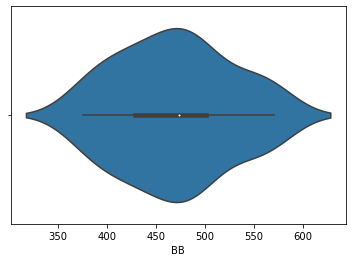

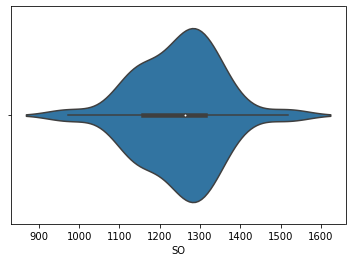

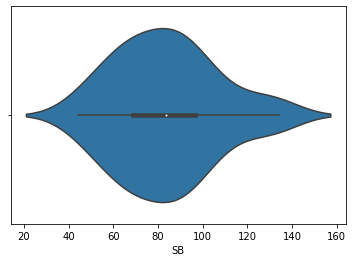

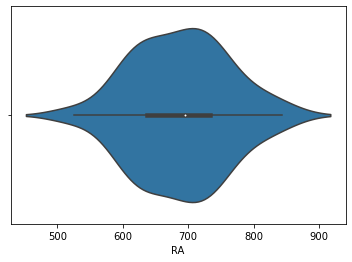

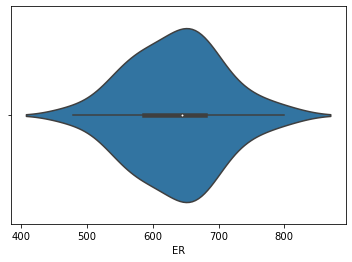

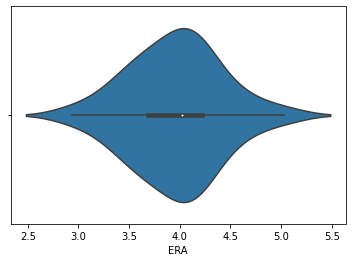

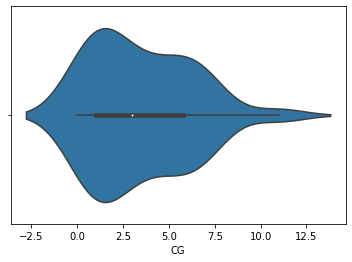

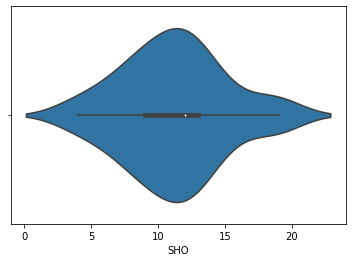

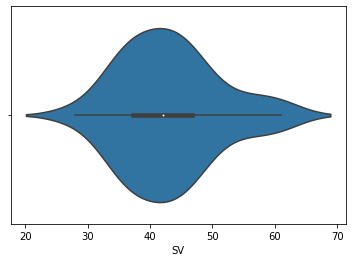

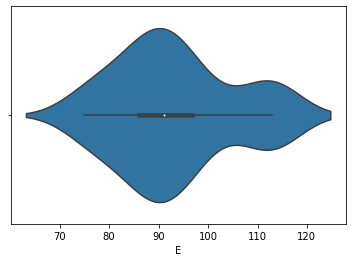

In [57]:
#using the below code creating violinplot.
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']

for i in df[columns]:
    plt.figure()
    sns.violinplot(df[i], data=df)

checking the violinplot in same time for all columns

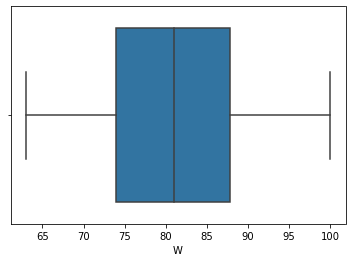

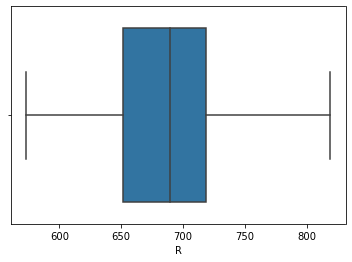

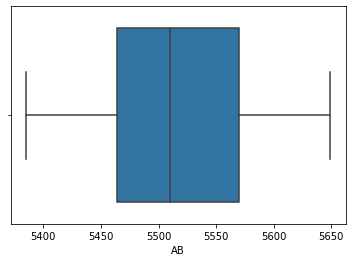

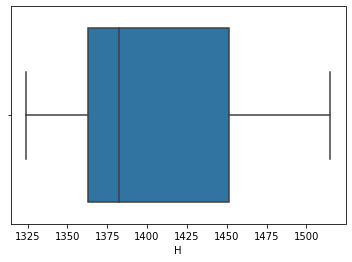

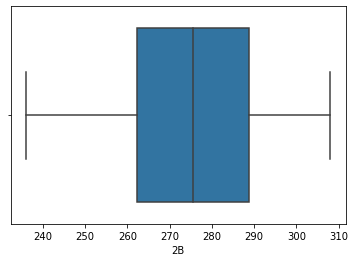

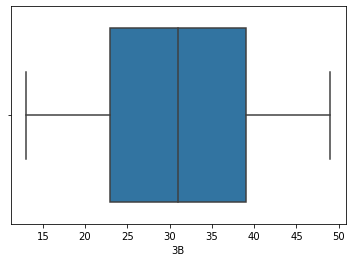

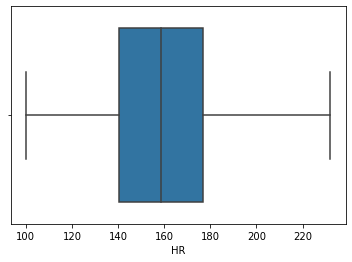

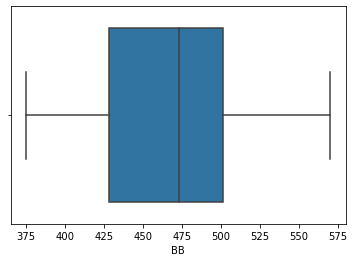

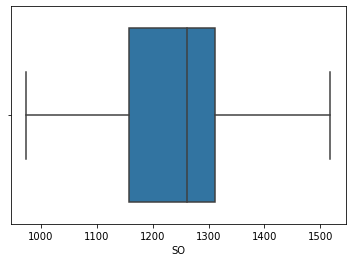

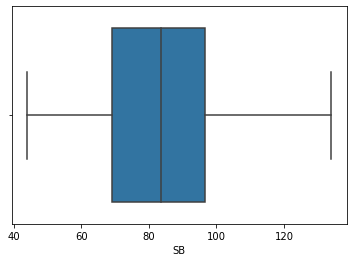

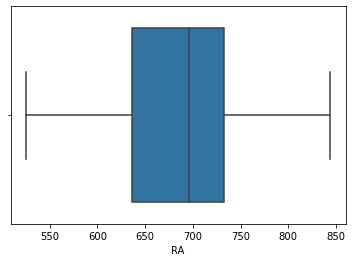

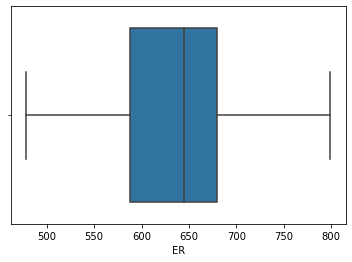

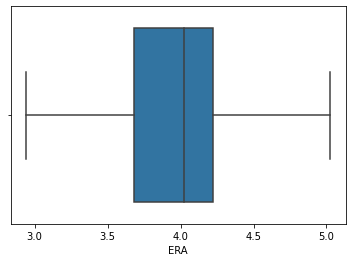

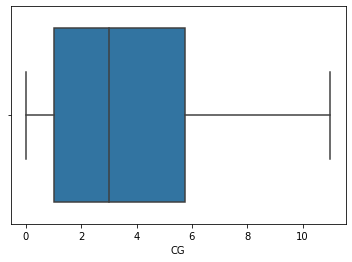

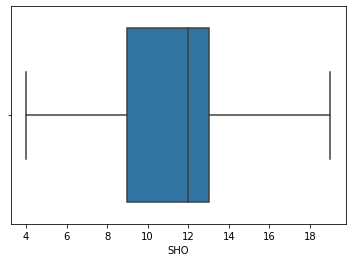

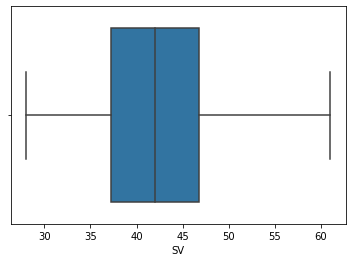

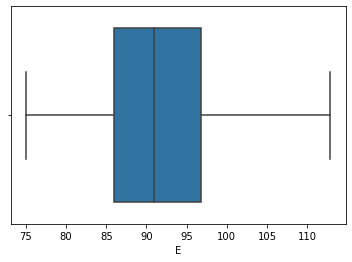

In [58]:
#using the below code creating violinplot.
columns = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']

for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i], data=df)

# Bivariate plotting

<AxesSubplot:xlabel='AB', ylabel='BB'>

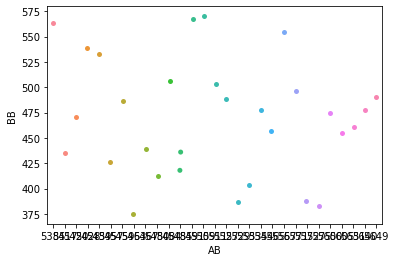

In [59]:
#Bivariate plotting
sns.stripplot(data=df, x=df['AB'],y=df['BB'])

<AxesSubplot:xlabel='2B', ylabel='3B'>

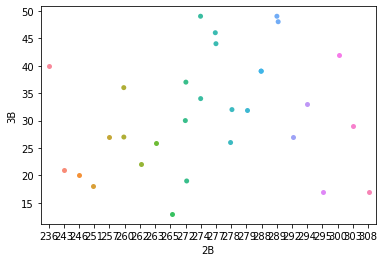

In [60]:
sns.stripplot(data=df, x=df['2B'],y=df['3B'])

<AxesSubplot:xlabel='SB', ylabel='SO'>

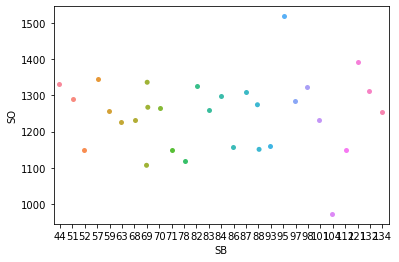

In [61]:
sns.stripplot(data=df, x=df['SB'],y=df['SO'])

<AxesSubplot:xlabel='R', ylabel='H'>

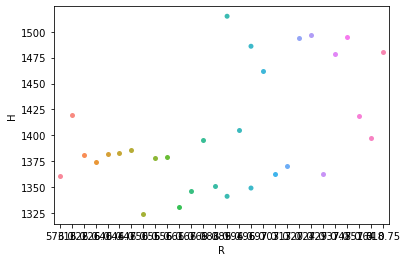

In [62]:
sns.swarmplot(data=df, x=df['R'], y=df['H'])

<AxesSubplot:xlabel='SO', ylabel='ERA'>

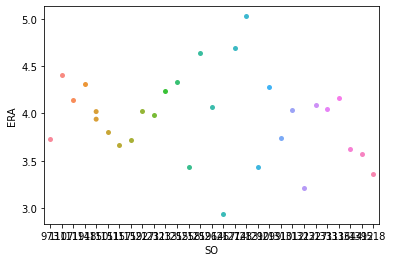

In [63]:
sns.swarmplot(data=df, x=df['SO'], y=df['ERA'])

<AxesSubplot:xlabel='ER', ylabel='ERA'>

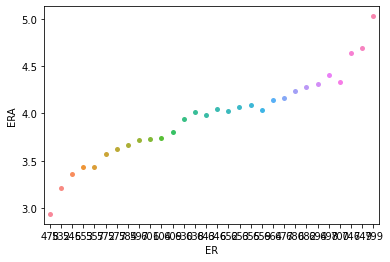

In [64]:
 sns.swarmplot(data=df, x=df['ER'], y=df['ERA'])

<AxesSubplot:xlabel='ER', ylabel='ERA'>

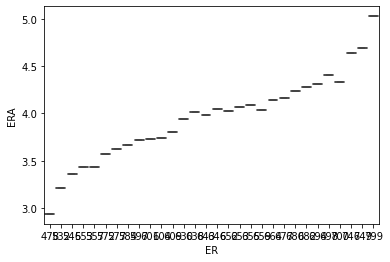

In [65]:
 sns.boxplot(data=df, x=df['ER'], y=df['ERA'])

<Figure size 1296x360 with 0 Axes>

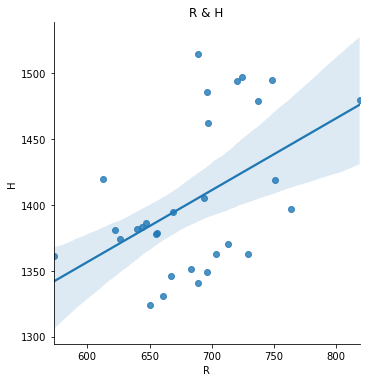

In [66]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.lmplot(x='R', y='H', data=df)
plt.title('R & H')
plt.show()

<Figure size 1296x360 with 0 Axes>

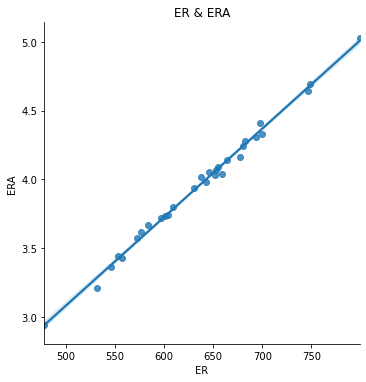

In [67]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.lmplot(x='ER', y='ERA', data=df)
plt.title('ER & ERA')
plt.show()

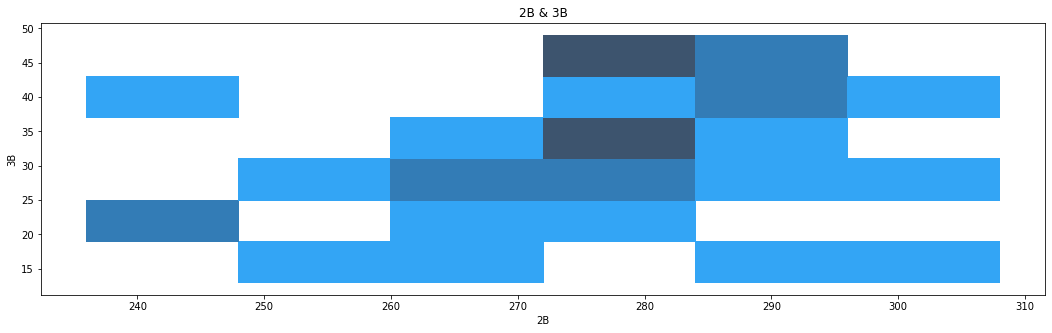

In [68]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.histplot(x='2B', y='3B', data=df)
plt.title('2B & 3B')
plt.show()

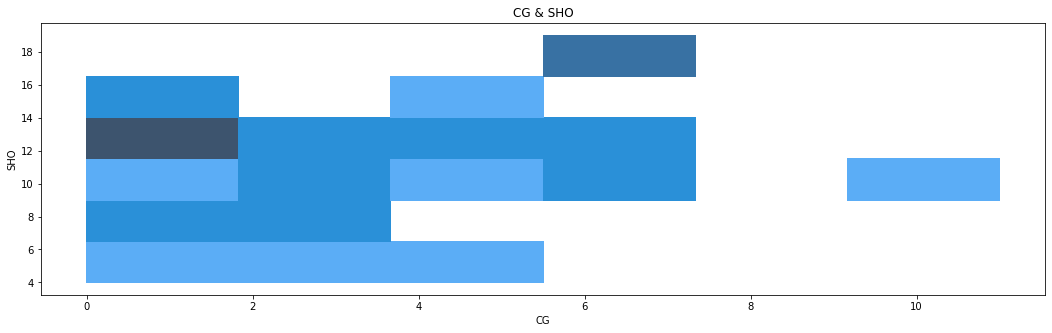

In [69]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.histplot(x='CG', y='SHO', data=df)
plt.title('CG & SHO')
plt.show()

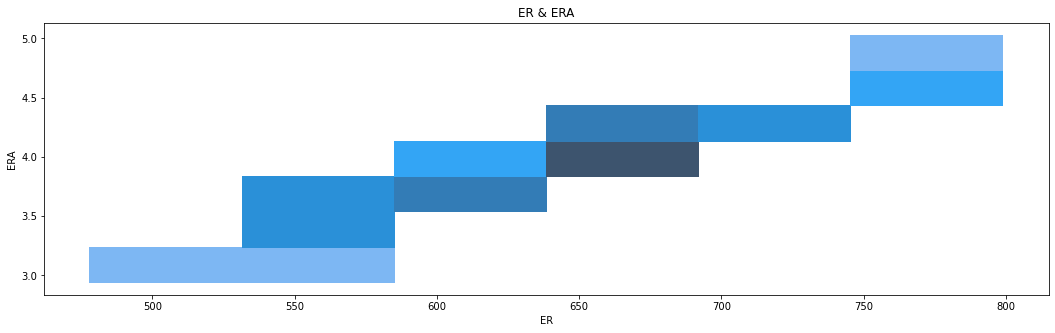

In [70]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.histplot(x='ER', y='ERA', data=df)
plt.title('ER & ERA')
plt.show()

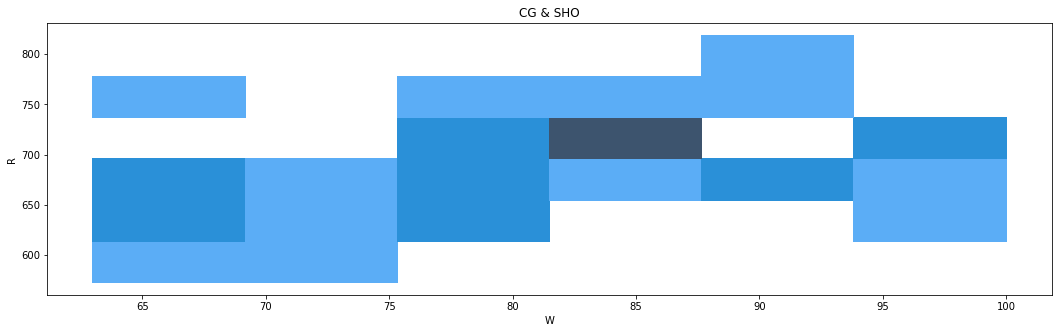

In [71]:
#plotting with figure and x,y, title
plt.figure(figsize=(18,5))
sns.histplot(x='W', y='R', data=df)
plt.title('CG & SHO')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


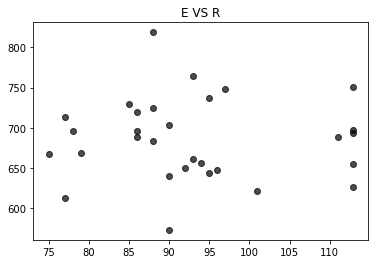

In [72]:
#bivariate analysis means two columns anaysis
#aplha we use for output transperency, and c for color combination R,G,B
plt.scatter(df['E'],df['R'], alpha=0.7, c=(0,0,0))
plt.title('E VS R')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


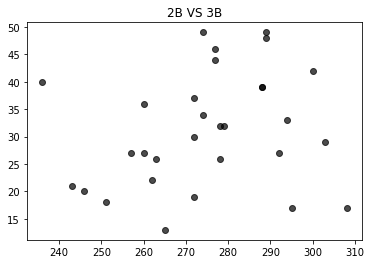

In [73]:
#bivariate analysis means two columns anaysis
#aplha we use for output transperency, and c for color combination R,G,B
plt.scatter(df['2B'],df['3B'], alpha=0.7, c=(0,0,0))
plt.title('2B VS 3B')
plt.show()

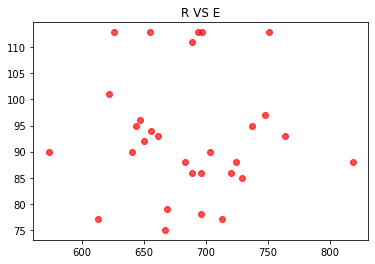

In [74]:
plt.scatter(df['R'],df['E'], alpha=0.7, color='red')
plt.title('R VS E')
plt.show()

In [75]:
#df.drop(columns=['E'])

# Model Run Train_ Test_ Split

# Standard Scaler

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23, 16)
(7, 16)
(23, 1)
(7, 1)


checking .22 data for train data and test data with shape

We will use StandardScaler for the dataset scaling of model

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [79]:
y_train

,W
7,81
10,88
19,64
24,63
6,87
22,71
23,67
18,68
17,97
2,81


checking the trained data values, y_train 

In [80]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [81]:
pred=lr.predict(x_test)
print("Predicted value and actual value",'\n', 'Predict Value:',pred,'\n','Y-Test Value:','\n',y_test)

Predicted value and actual value 
 Predict Value: [[103.2822695 ]
 [ 86.0007999 ]
 [ 92.58581442]
 [ 94.14449925]
 [ 80.30791226]
 [ 81.40951209]
 [ 64.48546697]] 
 Y-Test Value: 
      W
16  98
27  79
25  92
5   93
13  76
9   78
29  68


Prediction of actual value and predict value

In [82]:
lr.coef_

array([[ 1.53781398e-01, -8.27042500e-02,  4.69718352e-02,
        -8.31732030e-02, -5.94613606e-02, -7.73962950e-02,
        -2.68983058e-02, -3.27464830e-03, -1.31173469e-02,
         1.34090641e-01,  8.21410766e-01, -1.60935432e+02,
         3.74932299e-01,  3.93122444e-01,  4.36392393e-01,
        -1.46566689e-02]])

checking the coffiecient value of model

In [83]:
lr.intercept_

array([420.54644041])

find the interception value of model

In [84]:
#finding r2 score and mean squar error in model 

print("error:")

print("Mean absolute error:", mean_absolute_error(y_test, pred))
print("Mean squared error:", mean_squared_error(y_test,pred))

print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))


error:
Mean absolute error: 3.606477209068877
Mean squared error: 17.300207229282027
Root Mean Squared Error: 4.159351779939036


In [85]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))


0.9526645114568872
0.8317367697032911


In [86]:
y_pred=lr.predict(x_test)

In [87]:
print(r2_score(y_test,y_pred))

0.8317367697032911


# REGULARIZATION: L1 AND L2 REGULARIZATION

L1- LASSO REGRESSION L2- RIDGE REGRESSION

In [88]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
# x_train,y_train,x_test,y_test

#will reduce the coefficient to zero (those features are not informative)
#alpha values could be (.0001,.001,.01,.1,1,10,-----)
#Default value of alpha= 1.0
#alpha = 0.1



# Lasso

In [89]:
ls_reg=Lasso(alpha=0.0001)
ls_reg.fit(x_train,y_train)
ls_reg.score(x_train,y_train)

0.9451513825173216

In [90]:
ls_reg.coef_

array([ 1.45599172e-01, -1.92384849e-02,  1.24429497e-02, -1.19131541e-01,
       -1.93536857e-02, -6.31361890e-02, -2.83521060e-02,  1.13239732e-03,
        1.40987271e-03,  1.68669148e-01,  7.51142581e-02, -4.91685211e+01,
        7.81109014e-01,  3.45332868e-01,  7.04397288e-01, -4.17405505e-02])

# LassoCV

In [91]:
#LassoCV will return best alpha and coefficient after performing 20 cross validations
lc=LassoCV(alphas=None,cv=20,max_iter=100,normalize=True)
lc.fit(x_train,y_train)
alpha=lc.alpha_
alpha

0.14877011297665452

# Ridge

In [92]:
rd_reg=Ridge(alpha=0.0001)
rd_reg.fit(x_train,y_train)
rd_reg.score(x_train,y_train)

0.9525957582674861

In [93]:
rd_reg.coef_

array([[ 1.53048019e-01, -7.63918156e-02,  4.31946881e-02,
        -8.63392420e-02, -5.53527462e-02, -7.66197052e-02,
        -2.68575648e-02, -2.74010280e-03, -1.19966960e-02,
         1.33903630e-01,  7.51807325e-01, -1.49960087e+02,
         4.14993320e-01,  3.85969020e-01,  4.61119168e-01,
        -1.70423040e-02]])

# RidgeCV

In [94]:
#RidgeCV will return best alpha and coefficient after performing 20 cross validations.
#we are passing random numbers of array for ridgeCV to select best alpha from them
alphas=np.random.uniform(low=0,high=20,size=(30,))
rc=RidgeCV(alphas=alphas,cv=20,normalize=True)
rc.fit(x_train,y_train)


RidgeCV(alphas=array([ 5.03983976, 14.48524614, 13.98316751, 14.89264591,  5.1921051 ,
       10.66581138, 19.1268598 , 15.35593262, 13.62063574, 16.67847886,
       19.26718973,  3.16825331,  2.86412571,  2.47073402, 11.71897468,
       16.77050306, 17.62186948,  7.46567596,  6.80883508, 14.67629999,
        7.19999654,  8.28904667,  9.69159572, 13.52231889, 17.85411501,
       14.26620839,  2.70920205,  4.69333325,  0.26355553, 13.86569014]),
        cv=20, normalize=True)

In [95]:
rc.alpha_

5.039839760777856

Ridge validation and regression is better than Lasso validation and regression.

# Elasticnet Regression

In [96]:
#Elasticnet is a combination of both Lasso and Ridge
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9444824420492112


array([ 1.45344073e-01, -1.54479232e-02,  9.37536167e-03, -1.20064295e-01,
       -1.66315236e-02, -6.41258875e-02, -2.79028596e-02,  1.67058566e-03,
        1.35665377e-03,  1.60270887e-01,  4.38390637e-02, -4.28874871e+01,
        8.04457302e-01,  3.35874271e-01,  7.14984949e-01, -4.24964092e-02])

# HyperParameter tunning

In [97]:
from sklearn.svm import SVR

In [98]:
#hyper parameter tuning
svr= SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [99]:
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [100]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [101]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.46994917136369474
-0.0026445750083867736
-0.005581435181190475


# Saving the model

In [102]:
#import joblib

In [103]:
joblib.dump(lr,"Baseball.obj")

['Baseball.obj']

In [104]:
Baseballfile=joblib.load("Baseball.obj")
Baseballfile.predict(x_train)

array([[79.62233835],
       [87.47116828],
       [65.11205031],
       [59.13549189],
       [86.19992842],
       [69.96011116],
       [65.9157027 ],
       [69.46122856],
       [94.56509556],
       [80.40046973],
       [83.56897454],
       [88.78926383],
       [85.24960961],
       [86.00548089],
       [70.81636955],
       [83.28632605],
       [97.4215003 ],
       [73.08114386],
       [76.37364726],
       [87.29727424],
       [94.43874441],
       [76.38805001],
       [84.4400305 ]])